In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
import openturns as ot
import pandas as pd
import scipy
import seaborn as sns

from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap


from sklearn import cluster, mixture
from sklearn.decomposition import PCA
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

output_notebook()

Loading BokehJS ...

## Load the data

In [15]:
%%bash
# List the .csv files that are possible to analyze.
ls *.csv

B98.csv
BG98_EUROPE.csv
XFA-EUROVEH.csv


In [27]:
# Load the data
df = pd.read_csv('./B98.csv', header=None, index_col=0)

In [28]:
x = df
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
01/2013,2.095211,4.278267,3.961642,2.382186,3.412345,3.130373,3.762847,3.848019,4.544106,7.643071,...,4.877514,4.392725,3.464998,4.650119,5.073246,7.046810,9.076671,11.989240,16.053625,17.473212
02/2013,1.243013,4.677519,4.229476,5.089797,7.779773,7.063859,5.008871,5.345327,7.170142,10.149797,...,5.968644,5.147472,6.465291,7.979396,10.037398,12.955837,12.957628,15.308245,15.915508,17.314180
03/2013,1.320071,4.420377,5.164529,11.326923,12.240197,7.849134,6.264260,7.613348,8.940658,9.188314,...,6.976773,7.497644,6.901841,9.600055,11.511351,15.226597,14.257616,15.700610,13.876145,13.297487
04/2013,1.678648,19.873565,11.560579,10.649665,10.441620,6.067070,6.744401,5.166904,5.535006,6.233233,...,3.821708,6.029104,6.565934,5.054691,5.387032,7.684662,6.330084,8.581286,7.962417,8.903116
05/2013,0.991342,4.414898,3.147982,3.770556,2.010535,3.932643,3.232230,3.629052,3.830632,4.640984,...,4.679165,5.257205,5.930638,6.427134,5.998483,6.522112,6.361454,5.826462,5.748289,6.697727
06/2013,1.689523,4.614420,3.313112,2.980872,2.758816,3.706487,3.544920,3.656641,2.998073,3.807419,...,5.064498,4.087311,4.214941,3.737378,4.765316,5.240615,4.371295,4.959782,5.362924,6.899755
07/2013,1.093334,3.778543,2.442783,2.952084,3.377586,3.558146,4.409285,3.256571,3.808855,2.832352,...,5.054806,5.036016,5.590157,4.105784,5.213898,4.495654,3.507648,4.385827,4.798165,6.692762
08/2013,1.138278,3.329614,5.750160,2.233148,4.019696,3.234900,2.485872,3.738833,2.699228,3.470520,...,2.833161,2.476357,6.143669,3.845035,3.661830,2.706340,3.607741,3.856670,4.657333,7.264553
09/2013,1.274717,3.490802,2.797414,2.619666,3.107207,3.741869,2.886524,3.280172,4.066995,3.264438,...,4.614181,5.566430,4.125779,4.726795,3.213218,4.621961,4.467691,4.005874,4.550033,8.443047


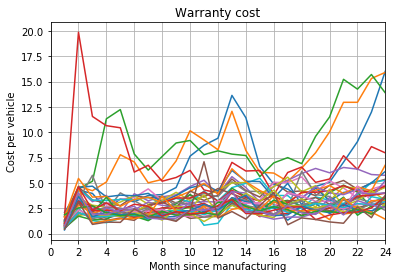

In [66]:
def plot_months(data):
    """Plot the data for all the months."""
    df = data.T
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(df)
    ax.set_xlim([0, len(df)-1])
    
    plt.title('Warranty cost')
    plt.xlabel('Month since manufacturing')
    plt.xticks(np.arange(0, len(df), 2))
    plt.ylabel('Cost per vehicle')
    plt.grid()
    plt.show()

# Plot all the months
plot_months(df)

In [29]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 2.66373387e+00,  1.38290367e-01,  6.54320206e-01,
        -2.15233684e-01,  2.15655159e-01,  2.24865515e-01,
         8.00971994e-01,  8.42901038e-01,  1.00170783e+00,
         2.14469883e+00,  2.63027146e+00,  3.35915691e+00,
         3.79393029e+00,  3.85313618e+00,  2.51472975e+00,
         1.25027737e+00,  7.89273462e-01,  4.61786771e-02,
         6.88149611e-01,  6.71811602e-01,  1.06285982e+00,
         1.82066706e+00,  2.29870538e+00,  3.28157643e+00,
         3.31081085e+00],
       [ 5.66838144e-01,  2.78063658e-01,  7.97678493e-01,
         1.04253248e+00,  2.07580660e+00,  2.88705442e+00,
         1.76839152e+00,  2.03347942e+00,  2.69336016e+00,
         3.41276785e+00,  2.89497460e+00,  2.74150077e+00,
         3.13946308e+00,  2.21783658e+00,  2.10621231e+00,
         2.10316816e+00,  1.31864473e+00,  2.10116615e+00,
         2.62939189e+00,  3.08226521e+00,  3.13445530e+00,
         3.25573245e+00,  3.30883762e+00,  3.24084127e+00,
         3.26453497e+00],
    

In [50]:
from sklearn.decomposition import PCA

# calculate the PCA (Eigenvectors & Eigenvalues of the covariance matrix)
pcaA = PCA(n_components=4, copy=True, whiten=False)

pcaA.fit(x)
dpca = pd.DataFrame(pcaA.transform(df))
dpca.index = df.index

In [51]:
for i,pc in enumerate(pcaA.explained_variance_ratio_):
    print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))

1.	74.21%
2.	8.66%
3.	5.60%
4.	2.75%


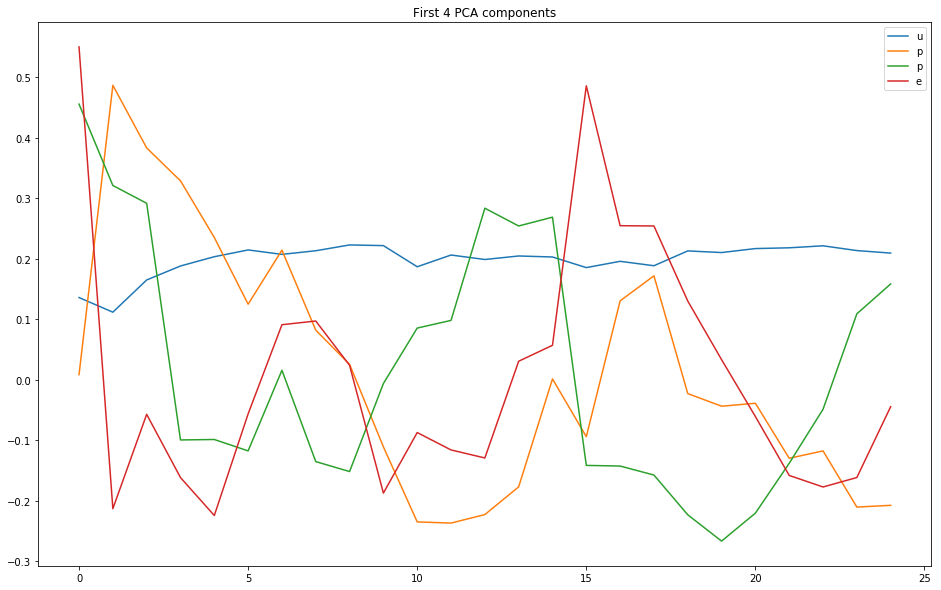

In [52]:
fig = plt.figure(figsize=(16,10))
plt.title('First {0} PCA components'.format(np.shape(np.transpose(pcaA.components_))[-1]))

plt.plot(np.transpose(pcaA.components_), label=['1. PC', '2. PC'])
plt.legend('upper right')

None



## valeurs propres:

In [56]:
pcaA.singular_values_
len(pcaA.components_[1])

25

## Reconstruction de la courbe:

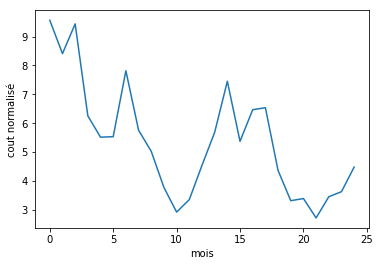

In [68]:
H = []
S = []

for j in range(len(pcaA.components_[0])):
    H.append(j)
    s = 0
    for i in range(len(pcaA.components_)):
        s += pcaA.components_[i][j] * pcaA.singular_values_[i]
    S.append(s)
plt.plot(H,S)
plt.xlabel('mois')
plt.ylabel('cout normalisé')
plt.show()

##  % de variance expliqué:

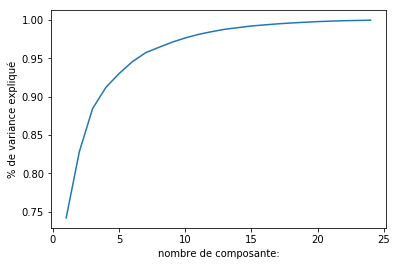

In [49]:
H = []
S = []
for i in range(1,25):
    pcaA = PCA(n_components=i, copy=True, whiten=False)
    pcaA.fit(x)
    dpca = pd.DataFrame(pcaA.transform(df))
    dpca.index = df.index
    L = np.cumsum(pcaA.explained_variance_ratio_)
    H.append(i)
    S.append(L[-1])
plt.plot(H,S)
plt.xlabel('nombre de composante:')
plt.ylabel('% de variance expliqué')
plt.show()